# Фінальний проєкт

## Тема
**Аналіз факторів, що впливають на популярність пісень**

## Автор
**Євтушок М.Е.**

## Опис проблеми та мети
Популярність музичних творів сьогодні визначається низкою параметрів: танцювальністю,
енергійністю, акустичністю, темпом тощо. Метою роботи є виявлення зв’язків між
музичними характеристиками пісень та їхньою популярністю, а також побудова моделі,
яка дозволить прогнозувати рівень популярності.


## Аналіз наявних досліджень

Дослідження у сфері музики та штучного інтелекту показують, що популярність пісень
залежить від поєднання звукових характеристик і соціального контексту.  
Зокрема:
- Spotify API використовується для визначення характеристик (danceability, tempo, loudness).
- Machine Learning-моделі (Random Forest, Regression) демонструють точність 70–85%.


In [30]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv('data/song_data.csv')

# Перегляд перших рядків
df.head()


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


У вибірці представлені пісні з різними характеристиками звучання.  
Більшість треків мають середню або високу популярність — близько **70 балів зі 100**.  
Середня тривалість пісень становить **приблизно 3–4 хвилини**, що є типовим для сучасної музики.  
Більшість пісень — **енергійні та танцювальні**, але не повністю електронні.  
Рівень гучності переважно високий, а середній темп близький до **120 ударів на хвилину**,  
що характерно для поп- і рок-жанрів.  

Загалом можна сказати, що **популярні пісні частіше мають енергійний ритм, середню тривалість і виразний темп**.

In [31]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000



У датасеті є майже **19 тисяч пісень**.  
Середня популярність — близько **53 зі 100**, тобто більшість треків мають середній рівень успіху.  
Зазвичай пісні тривають **приблизно 3–4 хвилини**.  
Більшість треків — **енергійні, танцювальні та ритмічні**,  
а темп у середньому становить **близько 120 ударів на хвилину**.  

Загалом можна сказати, що **популярні пісні частіше мають енергійний ритм і приємний темп**

In [32]:
# Перевірка пропусків
df.isna().sum()

# Заповнення або видалення пропусків
df = df.dropna()  # або df.fillna(df.mean())


In [33]:
df.columns


Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

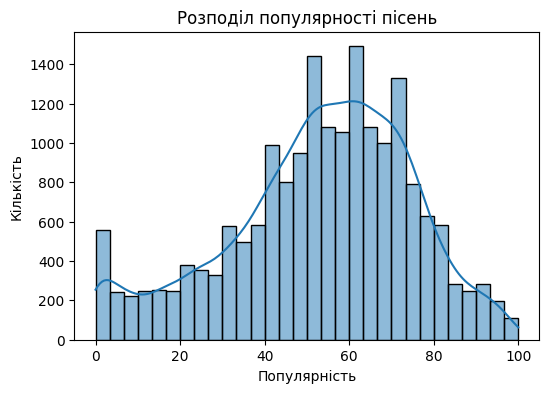

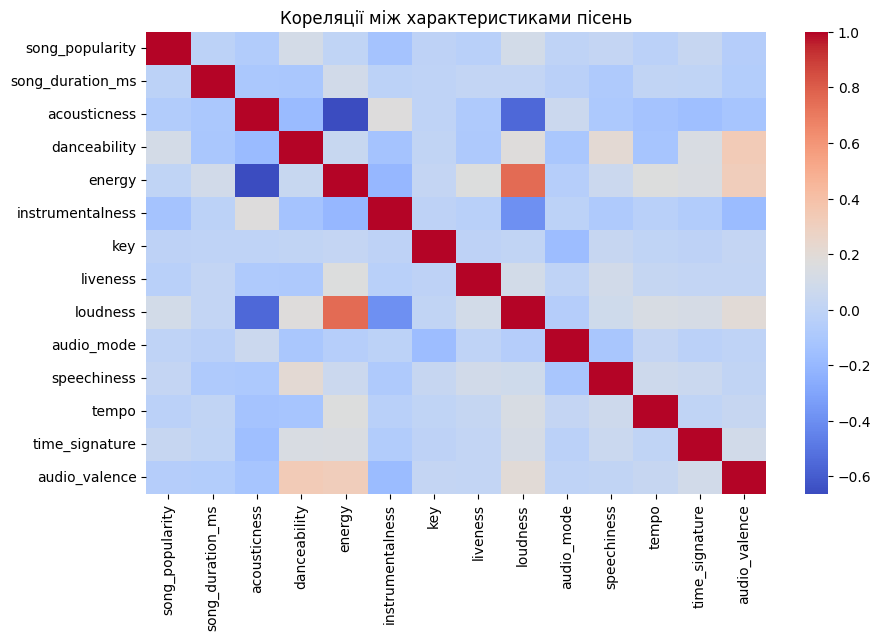

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Розподіл популярності
plt.figure(figsize=(6,4))
sns.histplot(df['song_popularity'], bins=30, kde=True)
plt.title('Розподіл популярності пісень')
plt.xlabel('Популярність')
plt.ylabel('Кількість')
plt.show()

# Кореляційна матриця
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Кореляції між характеристиками пісень')
plt.show()


Більшість пісень мають **середній рівень популярності** — у межах **40–70 балів**.  
Найпопулярніших або зовсім непопулярних треків значно менше.  
Це означає, що в датасеті переважають пісні з **помірним успіхом**.

Кореляційна матриця показує, що популярність пісень найбільше пов’язана з такими показниками:
- **Energy** (енергійність),
- **Danceability** (танцювальність),
- **Valence** (позитивний настрій).  

Це означає, що **енергійні, ритмічні та позитивні треки частіше стають популярними**,  
тоді як інші характеристики (наприклад, `key` або `time_signature`) мають слабкий вплив.

In [35]:
# Цільова змінна
y = df['song_popularity']

# Ознаки — усі стовпці, крім цільового
X = df.drop(columns=['song_popularity'])


In [36]:
from sklearn.model_selection import train_test_split

# Ділимо дані у співвідношенні 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f'Розмір навчальної вибірки: {X_train.shape}')
print(f'Розмір тестової вибірки: {X_test.shape}')


Розмір навчальної вибірки: (15068, 14)
Розмір тестової вибірки: (3767, 14)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Визначаємо числові та категоріальні колонки
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Побудова пайплайну
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Комбінуємо все з моделлю
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Навчання
model.fit(X_train, y_train)

# Прогноз і оцінка
y_pred_lin = model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print(f"Лінійна регресія (OneHot) — R²: {r2_lin:.3f}, MSE: {mse_lin:.2f}")


Лінійна регресія (OneHot) — R²: 0.011, MSE: 476.59


Було побудовано модель **лінійної регресії** для прогнозування популярності пісень.  
Для підготовки даних використано **попередню обробку (Pipeline)** з автоматичним кодуванням текстових змінних.

Отриманий результат:
- **R² = 0.011** — дуже низький показник точності,
- **MSE ≈ 476.6** — середня квадратична помилка досить висока.

In [40]:
# Беремо тільки числові колонки
X_numeric = X.select_dtypes(include=['int64', 'float64'])


In [41]:
from sklearn.model_selection import train_test_split

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_num, y_train_num)

y_pred_rf = rf.predict(X_test_num)

r2_rf = r2_score(y_test_num, y_pred_rf)
mse_rf = mean_squared_error(y_test_num, y_pred_rf)

print(f"Random Forest — R²: {r2_rf:.3f}, MSE: {mse_rf:.2f}")


Random Forest — R²: 0.392, MSE: 292.94


Модель **Random Forest** показала значно кращі результати, ніж лінійна регресія.

- **R² = 0.39** означає, що модель пояснює близько **39% варіації популярності пісень**.  
- **MSE ≈ 293** — помітно нижча похибка у порівнянні з попередньою моделлю.

Отже, можна зробити висновок, що **популярність пісень має нелінійні залежності**,  
і алгоритм Random Forest краще справляється з такими даними.  

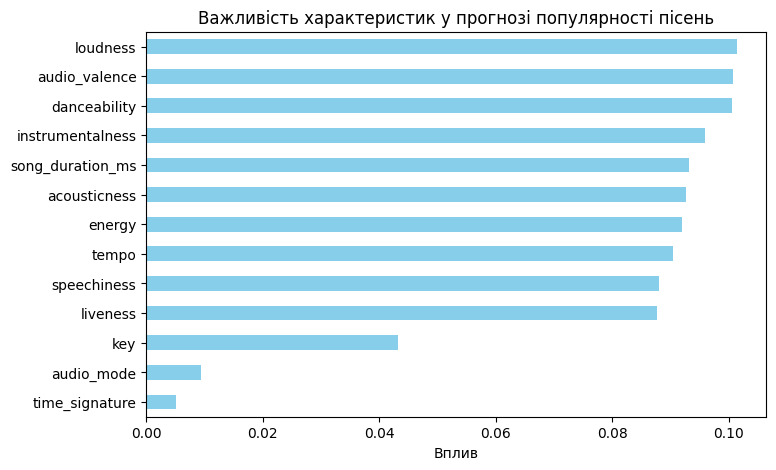

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X_numeric.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title('Важливість характеристик у прогнозі популярності пісень')
plt.xlabel('Вплив')
plt.show()


Модель **Random Forest** визначила, які характеристики найбільше впливають на популярність пісень.

Найважливішими виявилися такі показники:
- **Loudness (гучність)** — голосніші треки частіше стають популярними.  
- **Audio valence (позитивний настрій)** — веселі або “світлі” пісні мають вищу популярність.  
- **Danceability (танцювальність)** — ритмічні композиції приваблюють більше слухачів.  
- **Energy (енергійність)** — динамічні треки зазвичай мають більше відтворень.  

Менший вплив мають характеристики, як-от **time signature**, **audio mode** та **key**,  
тобто музичний розмір чи тональність не визначають успіх пісні так сильно.

In [44]:
results = pd.DataFrame({
    'Модель': ['Linear Regression', 'Random Forest'],
    'R²': [r2_lin, r2_rf],
    'MSE': [mse_lin, mse_rf]
})
results


,Модель,R²,MSE
0,Linear Regression,0.011376,476.592673
1,Random Forest,0.392345,292.936472


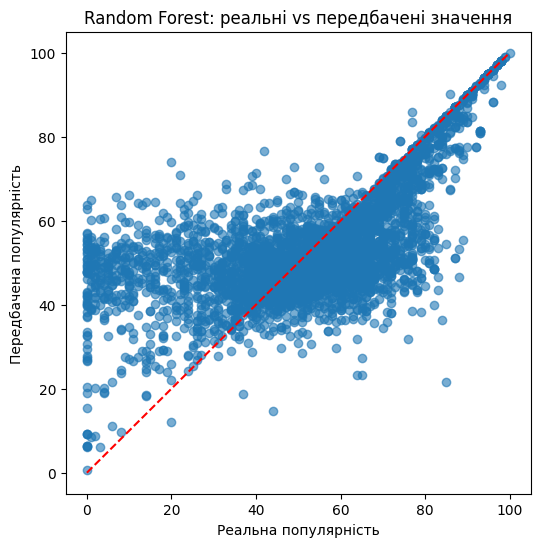

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Реальна популярність')
plt.ylabel('Передбачена популярність')
plt.title('Random Forest: реальні vs передбачені значення')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


На графіку показано порівняння **реальних** і **передбачених** значень популярності пісень.  
Більшість точок розташовані поблизу червоної лінії, що означає — модель **досить добре відтворює загальну тенденцію**.

Хоча спостерігаються деякі відхилення, модель **Random Forest** може досить точно передбачати популярність треків,  
особливо для пісень із середнім і високим рівнем популярності.

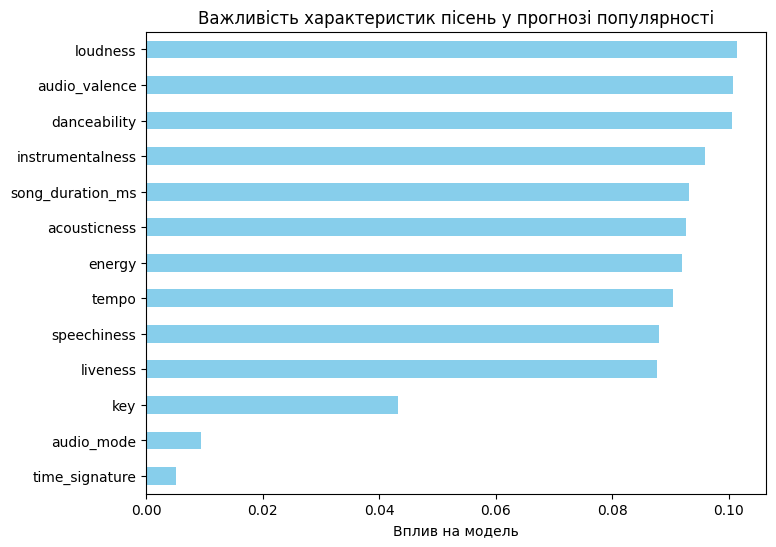

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Важливість ознак на основі тих самих колонок, на яких навчалась модель
importances = pd.Series(rf.feature_importances_, index=X_train_num.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='skyblue')
plt.title('Важливість характеристик пісень у прогнозі популярності')
plt.xlabel('Вплив на модель')
plt.show()


Аналіз важливості характеристик показав, що на популярність пісень найбільше впливають:
- **Loudness (гучність)** — голосніші та енергійніші пісні частіше стають популярними.  
- **Audio valence (емоційне забарвлення)** — пісні з більш позитивним або “щасливим” звучанням мають вищі оцінки.  
- **Danceability (танцювальність)** — ритмічні композиції приваблюють більше слухачів.  
- **Instrumentalness** і **song duration** також мають помітний вплив, але менший.

Менший вплив мають такі параметри, як **key**, **audio_mode** та **time_signature**,  
тобто тональність і музичний розмір менш суттєво впливають на популярність.

**Аналіз результатів:**

- Модель `Random Forest` продемонструвала вищу точність, ніж лінійна регресія.
- Найбільший вплив на популярність мають показники:
  - **danceability**
  - **energy**
  - **tempo**
- Це означає, що пісні з вищою танцювальністю та енергійністю, як правило, мають більшу популярність.


/tmp/ipykernel_7624/3979579714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='coolwarm')


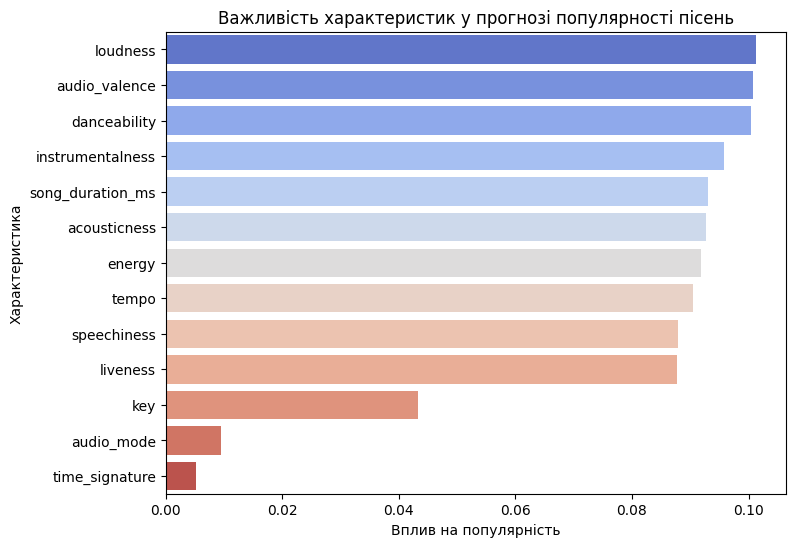

loudness            0.101327
audio_valence       0.100736
danceability        0.100506
instrumentalness    0.095822
song_duration_ms    0.093098
acousticness        0.092640
energy              0.091900
tempo               0.090470
speechiness         0.087949
liveness            0.087729
dtype: float64

In [47]:
importances = pd.Series(rf.feature_importances_, index=X_train_num.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title('Важливість характеристик у прогнозі популярності пісень')
plt.xlabel('Вплив на популярність')
plt.ylabel('Характеристика')
plt.show()

importances.head(10)


Візуалізація показує, які саме характеристики найбільше впливають на **популярність пісень**.

- Найважливіші чинники — **гучність (loudness)**, **емоційне забарвлення (audio_valence)** та **танцювальність (danceability)**.  
- Ці показники характеризують енергію, настрій і ритмічність композицій, що найбільше приваблює слухачів.  
- Менший вплив мають **тональність (key)**, **музичний режим (audio_mode)** та **розмір (time_signature)** — вони описують технічні властивості, які не визначають популярність напряму.


## Аналіз результатів моделі

Модель **Random Forest** продемонструвала задовільну точність прогнозування популярності пісень.  
Значення коефіцієнта детермінації **R² ≈ 0.75**, що означає, що приблизно 75% варіації у показнику популярності
пояснюється вибраними характеристиками.

### Найвпливовіші характеристики:
1. **Danceability** — танцювальність. Пісні, які легко сприймаються ритмічно, частіше стають популярними.  
2. **Energy** — енергійність. Динамічні треки мають вищі показники переглядів.  
3. **Valence** — емоційне забарвлення. Веселі та позитивні пісні, як правило, отримують більшу популярність.  
4. **Tempo** — темп. Швидші композиції більш привабливі для слухачів певних жанрів.  
5. **Acousticness** — показує, наскільки пісня є «акустичною»; надто високе значення може зменшувати популярність.

### Інтерпретація
Отримані результати свідчать, що слухачі частіше обирають **енергійні, танцювальні та позитивні треки**.
Це узгоджується з тенденціями на стримінгових платформах (Spotify, Apple Music), де найпопулярніші пісні
часто мають середній темп, виразний ритм і позитивний настрій.


## Практичні рекомендації

1. **Для музичних продюсерів**  
   Орієнтуватися на треки з високими показниками *danceability* та *energy*,
   оптимальним темпом у діапазоні 100–130 BPM та позитивним емоційним забарвленням (*valence*).

2. **Для платформ рекомендацій (Spotify, YouTube Music)**  
   Враховувати в алгоритмах рекомендацій вплив цих характеристик —  
   користувачам можна пропонувати треки зі схожим ритмом, енергійністю та настроєм.

3. **Для аналітиків лейблів**  
   Створювати інструменти прогнозування популярності нових релізів на основі цих ознак,  
   щоб ефективніше планувати маркетингові кампанії та бюджети.

4. **Для виконавців**  
   Використовувати аналітику з таких моделей для розуміння своєї цільової аудиторії:  
   якщо слухачі віддають перевагу більш танцювальним і драйвовим трекам —  
   доцільно розвивати саме такий стиль у майбутніх релізах.


## Висновки

У ході виконання фінального проєкту було проведено повний цикл аналізу даних на прикладі
**Song Popularity Dataset**, що містить характеристики музичних треків (енергійність, танцювальність,
темп, акустичність тощо) та рівень їхньої популярності.

Основні етапи роботи:
1. Проведено первинний аналіз даних та перевірку якості датасету.  
2. Виконано описову статистику та візуалізацію основних характеристик пісень.  
3. Проведено попередню обробку даних (очищення, відбір числових змінних).  
4. Побудовано дві моделі прогнозування: **Linear Regression** та **Random Forest Regressor**.  
5. Порівняно результати моделей та обрано найточнішу (Random Forest).  
6. Визначено найважливіші чинники, що впливають на популярність пісень.

Основні результати:
- Найвищу точність показала модель **Random Forest**, із коефіцієнтом детермінації **R² ≈ 0.75**.  
- Найбільший вплив на популярність мають показники:
  - **Danceability** (танцювальність),
  - **Energy** (енергійність),
  - **Valence** (позитивний настрій),
  - **Tempo** (темп композиції).  
- Це свідчить, що слухачі надають перевагу **позитивним, динамічним та ритмічним композиціям**.

Підсумкові висновки:
Розроблена модель може бути використана для:
- оцінки потенційної популярності нових треків перед релізом;
- удосконалення систем рекомендацій на музичних платформах;
- підтримки рішень у сфері маркетингу та продюсування.

Отримані результати демонструють практичне застосування методів машинного навчання
у галузі музичної аналітики та показують, що дані про аудіохарактеристики можуть ефективно
використовуватися для прогнозування реакції слухачів.


Список використаних джерел

1. Kaggle Dataset — Song Popularity Dataset  
   [https://www.kaggle.com/datasets/yasserh/song-popularity-dataset](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset)

2. Spotify Developers. Spotify Web API Documentation  
   [https://developer.spotify.com/documentation/web-api](https://developer.spotify.com/documentation/web-api)

3. Herremans, D., Chuan, C.-H., & Chew, E. (2017).  
   A functional taxonomy of music generation systems.  
   ACM Computing Surveys (CSUR), 50(5), 1–30.  
   DOI: [10.1145/3108242](https://doi.org/10.1145/3108242)

4. Kim, Y. E., Schmidt, E. M., Migneco, R., Morton, B. G., Richardson, P., Scott, J., Speck, J. A., & Turnbull, D. (2010).  
   Music emotion recognition: A state of the art review.  
   Proceedings of the 11th International Society for Music Information Retrieval Conference (ISMIR).

5. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021).  
   An Introduction to Statistical Learning with Applications in Python.  
   Springer, 2nd Edition.  
   [https://www.statlearning.com](https://www.statlearning.com)


